# Short Selling/Short Positions

What's the rational behind short selling an instrument?

**Making profits/positive returns when prices fall.**

**Stocks example:**

Today an investor buys the ABC stock for \\$100. One day later he sells the stock for \\$110.
<br>
**Profit: \\$10**
<br>
**Long Position (benefits from rising prices)**

Today an investor borrows the ABC stock from another investor and sells it for \\$100. One day later he buys the stock for \\$90 and retuns it to the lender.
<br>
**Profit: \\$10**
<br>
**Short Position (benefits from failling prices)**

In some countries (and for some instruments like stocks) short selling is prohibited.
<br>
Most intuitive/popular use case for short selling: **Currencies (Forex)**

**EUR/USD** ("Long Euro" == "Short USD")

In [2]:
t0 = 1.10
t1 = 1.25

Today an investor buys €1 and pays \\$1.10. One day later he sells €1 for \\$1.25.
<br>
**Profit: \$10**
<br>
**Long Position (benefits from rising prices)**

In [4]:
t1 / t0 - 1 # the EUR appreciates by 13.64% relative to USD (simple return)

0.13636363636363624

EUR Long Position returns **13.64%** (simple return)

What return would you expected for the corresponding EUR short position?

In [6]:
t0 = 1 / 1.10
t1 = 1 / 1.25

In [9]:
t1 / t0 - 1 # the USD depreciates by 12% relative to EUR

-0.11999999999999988

EUR short position returns **-12%** (simple return)

## Real Data Analysis

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.6f}'.format
plt.style.use("seaborn-v0_8")

In [12]:
close = pd.read_csv("close.csv", index_col = "Date", parse_dates = ["Date"])
close

,BA,BTC-USD,EURUSD=X,GC=F,MSFT,^DJI
Date,,,,,,
2014-10-01,124.669998,383.614990,1.262834,1214.599976,45.900002,16804.710938
2014-10-02,124.169998,375.071991,1.262419,1214.199951,45.759998,16801.050781
2014-10-03,126.360001,359.511993,1.267058,1192.199951,46.090000,17009.689453
2014-10-04,NaN,328.865997,NaN,NaN,NaN,NaN
2014-10-05,NaN,320.510010,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-05-26,241.369995,39294.199219,1.224909,1901.300049,251.490005,34323.050781
2021-05-27,250.699997,38436.968750,1.219260,1895.699951,249.309998,34464.640625
2021-05-28,247.020004,35697.605469,1.219319,1902.500000,249.679993,34529.449219


In [13]:
close["USDEUR=X"] = 1/close["EURUSD=X"]
close

,BA,BTC-USD,EURUSD=X,GC=F,MSFT,^DJI,USDEUR=X
Date,,,,,,,
2014-10-01,124.669998,383.614990,1.262834,1214.599976,45.900002,16804.710938,0.791870
2014-10-02,124.169998,375.071991,1.262419,1214.199951,45.759998,16801.050781,0.792130
2014-10-03,126.360001,359.511993,1.267058,1192.199951,46.090000,17009.689453,0.789230
2014-10-04,NaN,328.865997,NaN,NaN,NaN,NaN,NaN
2014-10-05,NaN,320.510010,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2021-05-26,241.369995,39294.199219,1.224909,1901.300049,251.490005,34323.050781,0.816387
2021-05-27,250.699997,38436.968750,1.219260,1895.699951,249.309998,34464.640625,0.820170
2021-05-28,247.020004,35697.605469,1.219319,1902.500000,249.679993,34529.449219,0.820130


In [14]:
fx = close[["EURUSD=X", "USDEUR=X"]].dropna().copy()
fx

,EURUSD=X,USDEUR=X
Date,,
2014-10-01,1.262834,0.791870
2014-10-02,1.262419,0.792130
2014-10-03,1.267058,0.789230
2014-10-06,1.251361,0.799130
2014-10-07,1.264606,0.790760
...,...,...
2021-05-24,1.218324,0.820800
2021-05-25,1.221464,0.818690
2021-05-26,1.224909,0.816387


<Axes: xlabel='Date'>

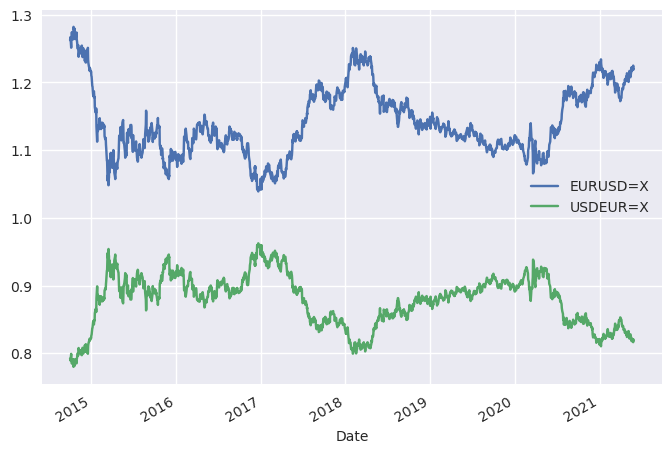

In [26]:
fx.plot()

In [17]:
simple_ret = fx.pct_change() # simple returns
simple_ret

,EURUSD=X,USDEUR=X
Date,,
2014-10-01,NaN,NaN
2014-10-02,-0.000328,0.000328
2014-10-03,0.003674,-0.003661
2014-10-06,-0.012389,0.012544
2014-10-07,0.010585,-0.010474
...,...,...
2021-05-24,-0.003448,0.003460
2021-05-25,0.002577,-0.002571
2021-05-26,0.002821,-0.002813


In [18]:
simple_ret.add(1).prod() - 1 # compound simple returns

EURUSD=X   -0.034458
USDEUR=X    0.035688
dtype: float64

**For simple returns: long position retuns != short position returns * (-1)**

In [19]:
log_ret = np.log(fx / fx.shift()) # log returns
log_ret

,EURUSD=X,USDEUR=X
Date,,
2014-10-01,NaN,NaN
2014-10-02,-0.000328,0.000328
2014-10-03,0.003668,-0.003668
2014-10-06,-0.012466,0.012466
2014-10-07,0.010529,-0.010529
...,...,...
2021-05-24,-0.003454,0.003454
2021-05-25,0.002574,-0.002574
2021-05-26,0.002817,-0.002817


In [20]:
log_ret.sum() # cumulative log returns

EURUSD=X   -0.035066
USDEUR=X    0.035066
dtype: float64

**For log returns: long position returns == short position returns * (-1)**

In [21]:
norm_fx = log_ret.cumsum().apply(np.exp) # normalised prices (base 1)
norm_fx

,EURUSD=X,USDEUR=X
Date,,
2014-10-01,NaN,NaN
2014-10-02,0.999672,1.000328
2014-10-03,1.003345,0.996666
2014-10-06,0.990915,1.009168
2014-10-07,1.001404,0.998598
...,...,...
2021-05-24,0.964754,1.036534
2021-05-25,0.967240,1.033869
2021-05-26,0.969969,1.030961


In [24]:
norm_fx.iloc[0] = [1, 1]
norm_fx

,EURUSD=X,USDEUR=X
Date,,
2014-10-01,1.000000,1.000000
2014-10-02,0.999672,1.000328
2014-10-03,1.003345,0.996666
2014-10-06,0.990915,1.009168
2014-10-07,1.001404,0.998598
...,...,...
2021-05-24,0.964754,1.036534
2021-05-25,0.967240,1.033869
2021-05-26,0.969969,1.030961


<Axes: xlabel='Date'>

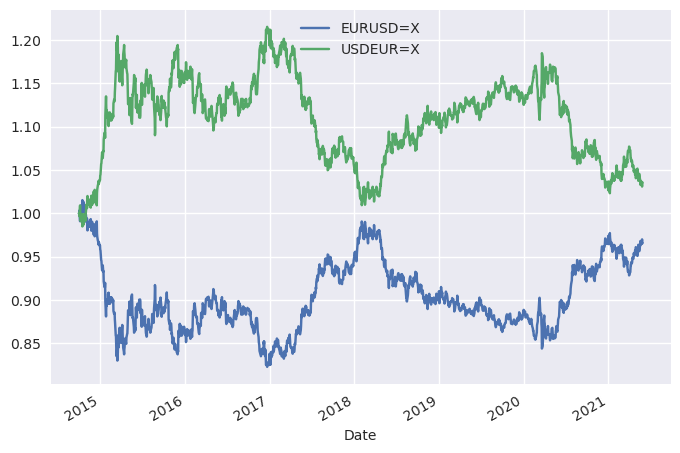

In [27]:
norm_fx.plot()